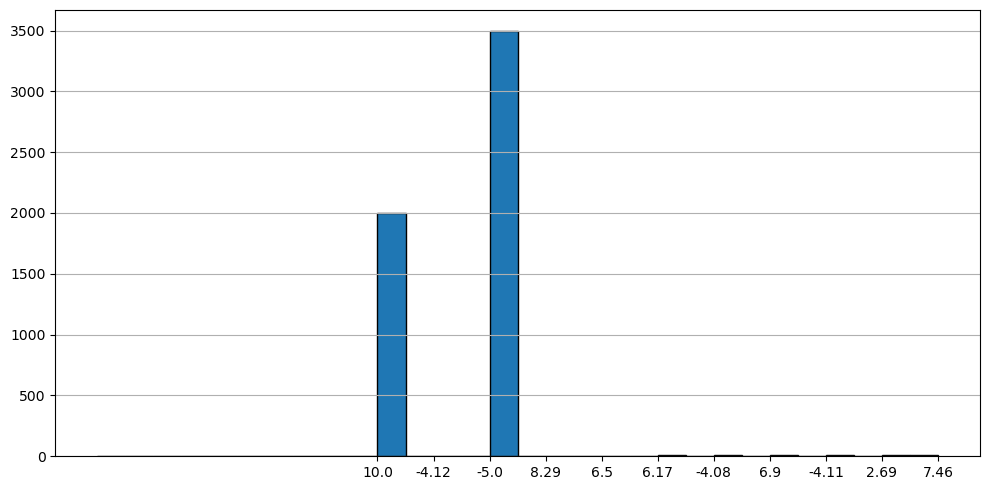

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# 🔹 데이터 로드
df = pd.read_csv('/root/jupyter_home/tank_project/ready/포탑제어 파트/Data/turret_info_final.csv')

# y_angle 열 기준
bins = np.linspace(-5, 10, 31)  # 30개 구간 → 31개의 경계점

plt.figure(figsize=(10, 5))
plt.hist(df['y_angle'], bins=bins, edgecolor='black')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# 🔹 피처 엔지니어링
df['dx'] = df['x_target'] - df['x_pos']
df['dy'] = df['y_target'] - df['y_pos']
df['dz'] = df['z_target'] - df['z_pos']
df['distance'] = np.sqrt(df['dx']**2 + df['dy']**2 + df['dz']**2)

# 🔹 각도 정리: degree → radian → sin/cos
df[f'y_rad'] = np.deg2rad(df[f'y_angle'])
df[f'y_sin'] = np.sin(df[f'y_rad'])
df[f'y_cos'] = np.cos(df[f'y_rad'])
display(df.head())

# 🔹 입력(X), 출력(y)
X = df[['distance']]
y = df[['y_sin', 'y_cos']]

# 🔹 데이터 분할 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)